<a href="https://www.kaggle.com/code/dascient/uacp-uap-analytic-centralization-program?scriptVersionId=127715107" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🛸Welcome to The UACP🇺🇳
[DaScient Proprietary Intelligence Artifact](https://www.dascient.com)
## 👾UAP (Unidentified Anomalous Phenomena) Analytic Centralization Program💻
### 🌊All-Domain⛰Data🗺Exploitation🧮AI-ML-DS📊& More to Come🪐
### 🔭Research, 📈Analysis, 🌌A Multiversal Collaborative Effort of Investigating the Nature of Something More Extraordinary Than Ourselves, & 🤖Pure Enjoyment

### An attempt to exploit NUFORC's public 📘 reports of first-hand sightings & experiences of [Anomalous Phenomena](https://en.wikipedia.org/wiki/Association_for_the_Scientific_Study_of_Anomalous_Phenomena). Please see [NUFORC](https://nuforc.org/databank/)'s webpage to get a better understanding of the nature of the data. If anyone would like to direct us to more (potentially) correlational datasets 🛰 (.csv, .json, .xlsx, etc...), please message us at contact@dascient.com right away! Give us ALL the data - give it to us!!!


### This project is also very much a work-in-progress. We intend to leverage other public/open-source databases to further our research (i.e. 🛩️commercial air traffic data, 🚁multi-domain track-correlation analysis, oceanographic data, drone traffic, and so on) & investigative methods by aggregating pertinent resources to augment the reproducible scalability of it's applications & the overall *purpose* of our mission. 

## 🛥️Ultimate Mission🛩️
Provide a proof-of-concept of an all-domain analytic effort that would address [national priority needs](https://en.m.wikipedia.org/wiki/National_Intelligence_Priorities_Framework#:~:text=The%20National%20Intelligence%20Priorities%20Framework,summarizes%20the%20United%20States%27s%20intelligence) of the [ODNI](https://www.dni.gov/files/ODNI/documents/assessments/Unclassified-2022-Annual-Report-UAP.pdf)'s (see pages 8, 9, & Appendix B: Duties) rising [AARO](https://en.m.wikipedia.org/wiki/All-domain_Anomaly_Resolution_Office)-focused mandates & delegations spread throughout the IC in support of this particular subject matter - <b>as well as, what may come forth beyond it's research & potentially disruptive scientific & philosophical discoveries</b>. 

This Kaggle notebook may serve as a simple copy-paste template for data exploration, visual analytics, & AI|ML|DS applicable techniques for data scientists, intelligence & cybersecurity analysts, computer programmers, & engineers within their respective & appropriate positions throughout each delegated members of the [IC](https://www.dni.gov/index.php/what-we-do/members-of-the-ic). And to EVERYONE else in the UAP-arena that can play around with more datasets & realize the capabilities of its applications. We hope this provides at least a small contribution to the scientific community as an analytic deliverable that can be used to address UAP-focused needs as requested by their head hanchos (on an "annual" basis). Share. Collaborate. Scrutinize. Criticize. Optimize. Improve. *Unite*!

We also aim to provide insights derived from the latest [JWST](https://webb.nasa.gov/) research & findings, as we cannot philosophically rule out the idea that we have ever been alone. We hope to unveil the natural proposition that, in fact, "...we are a part of the norm, we are not an exception." -[Christopher Mellon](https://www.christophermellon.net), Former DASDI. 

#### *We hope this serves something delightful.*
#### See Contributors & Collaborators below.

In [ ]:
from IPython.display import Image
Image("/kaggle/input/creation-seti-institute/cidA95F9235-D85C-4AAA-94D0-4CA8397E03B4.jpg")

#  Load our packages & NUFORC's 80K dataset as a csv.

In [ ]:
# This Python 3 Analysis of NUFORC's database contains 80,0000 rows of reported sightings. 
# I'm so glad this one came with Lat/Long,s for me to play with.

# for the sake of expeditious analysis
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS
from geopandas import GeoDataFrame
import matplotlib.colors as colors
import seaborn as sns
import random as r

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print('File:',os.path.join(dirname, filename))

# settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# set plot margin limits
#plt.xlim(right=xmax) #xmax is your value
#plt.xlim(left=xmin) #xmin is your value
#plt.ylim(top=ymax) #ymax is your value
#plt.ylim(bottom=ymin) #ymin is your value

# What does the data look like?

In [ ]:
# loading first nuforc dataframe
og_df1 = pd.read_csv('/kaggle/input/ufo-sightings/ufos.csv',header=0)
df = og_df1.dropna().copy()

# loading more nuforc

# d/NUFORC/ufo-sightings
og_df2 = pd.read_csv('/kaggle/input/d/NUFORC/ufo-sightings/scrubbed.csv',header=0)
df2 = og_df2.dropna().copy()

# ufo-sightings-1969-to-2019 - more details than the previous two
og_df3 = pd.read_csv('/kaggle/input/ufo-sightings-1969-to-2019/nuforc_reports.csv',header=0)
df3 = og_df3.dropna().copy()

#############################################
# sanitize
# drop some columns, for now
df = df.drop(columns=['datetime','duration (hours/min)'])
df2 = df2.drop(columns=['datetime','duration (hours/min)'])

# date posted deemed to be easily conveible to timestamp values, so i'm gonna work with that for now.
df['date posted'] = df['date posted'].astype('datetime64[ns]')
df2['date posted'] = df2['date posted'].astype('datetime64[ns]')

# lowercase all comments
df['comments'] = df['comments'].str.lower()
df2['comments'] = df2['comments'].str.lower()

# length of comments
df['comment_length'] = [len(str(v[0:100])) for i,v in df.comments.items()]
df2['comment_length'] = [len(str(v[0:100])) for i,v in df2.comments.items()]

# convert seconds to minutes
df["duration (minutes)"] = [int(v)/60 for i,v in df["duration (seconds)"].items()]
df2["duration (minutes)"] = [float(v)/60 for i,v in df2["duration (seconds)"].items()]

# let's create subsets of our 80,000 here: 
# we can implement conditionals, remove/analyze outliers, 
# & will enable for back referencing when starting to run 
# robust AI-ML modeling that would otherwise take much longer to run.

# let's create subsets from the main dataframe/reporting-data w/ respect to duration of observations
df_under100 = df[df["duration (minutes)"]<100]
df_under60 = df[df["duration (minutes)"]<60]

# df2
df2_under100 = df2[df2["duration (minutes)"]<100]
df2_under60 = df2[df2["duration (minutes)"]<60]

# random binary column for future AI-ML modeling.
a=['2nd-hand','debunked','un-verified','verified']       
df['verified'] = pd.Series(r.choices(a,k=len(df)),index=df.index)
df2['verified'] = pd.Series(r.choices(a,k=len(df2)),index=df.index)

# shape-focused
circles = df[df['shape'] == 'circle']
spheres = df[df['shape'] == 'sphere']
lights = df[df['shape'] == 'light']
teardrops = df[df['shape'] == 'teardrop']

# df2
circles = df2[df2['shape'] == 'circle']
lights = df2[df2['shape'] == 'light']
teardrops = df2[df2['shape'] == 'teardrop']

# year-month
df['year_month'] = df['date posted'].dt.to_period('M')
df2['year_month'] = df2['date posted'].dt.to_period('M')

# combine df1 & df2
# at the moment, it seems df == df2 for the most part.
# however, df3 is different

# show
print(f"\nReports: {len(df)} non-null dataframe.")
print("\nMatrix:",df.shape[0],"rows,",df.shape[1],"columns")
df = df.sort_values('date posted',ascending=True).reset_index(drop=True)
df.tail(11).reset_index(drop=True)

#### 👆🏽Typical reporting-type dataset - City, State, Shapes Seen, Observation Duration, Geolocation 👆🏽

##### For now, disregard column 'verified'. It is a randomly generated vector that will later be used to prove AI-ML modeling. 
##### We use 'verified' values to include: '2nd-hand','debunked','un-verified', or 'verified'.

# Analysis
## Top 20 Shapes

In [ ]:
df['shape'].value_counts().head(20).plot(kind='bar',figsize=(15,3),color='purple')
plt.xticks(rotation=45)
plt.show()

## Top 20 Cities

In [ ]:
df['city'].value_counts().head(20).plot(kind='bar',figsize=(15,3),color='lightblue')
plt.xticks(rotation=45)
plt.show()

## Top 20 Comments

In [ ]:
# decrese length of comments for cleaner chart
comments = pd.Series([str(v)[0:25] for i,v in df['comments'].items()])
comments.value_counts().head(20).plot(kind='bar',figsize=(15,3),color='lightpink',fontsize=7)
plt.xticks(rotation=45)
plt.show()

## Duration, Lat, Lon - numerical insight.



In [ ]:
df.describe().style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '12px'})

#### Average duration of sighting: 6572.996774 seconds, or 109.549923 mins. 

#### The Lat/Lon: 72.700000,153.099533 - may or may not be significant. We'll see later.

## 3D-Plots
### Date - City - Shape - Comment Length
Sample size of 10,000 observations, 

In [ ]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter_3d(df.sample(10000), x='city', y='shape', z='date posted',
              color='shape',
              size = 'comment_length',
              #symbol = 'state',
              #opacity=0.7,
              size_max=11
                    
                   )
fig.show()

### Date - State - Shape - City
Sample size of 10,000 observations.

In [ ]:
fig = px.scatter_3d(df.sample(10000), x='city', y='state', z='date posted',
              color='shape',
              size = 'comment_length',
              #symbol = 'country',
              opacity=0.7,
              size_max=11
                    
                   )
fig.show()

## Plotly Scatter Plots
### By Observation Duration in Minutes, City, Shape, Labeled by Country - Sized by Comment Length
A sample size of 30,000.

In [ ]:
import plotly_express as px

# we can leverage this plotly device to exhibit specific details 
# about any subset from the data that particulates target-topics, pattern-of-life, or whatever is deemed
# worthy of deeper analysis.
# Instead of using df.sample(30000) as our input, let's create a few target-topic & pattern-of-life samples.

df_sphere_city = df[(df['city']=='seattle') & (df['shape']=='sphere')]


In [ ]:
# let 'a' be your target-topic/pattern-of-life of choice.
a = df.sample(30000)
#a = df_sphere_city

px.scatter(a,
           x = 'duration (minutes)', 
           y = 'city',
           color='shape',
           size='comment_length',
           animation_frame='year_month', 
           animation_group='country',
           text='country',
           range_x = [0,30])

### By Observation Duration in Minutes, State, Country, Labeled by Shape - Sized by Comment Length
The entire dataset.

In [ ]:
px.scatter(df,
           x = 'duration (minutes)', 
           y = 'state',
           color='shape',
           size='comment_length',
           symbol='country',
           animation_frame='year_month', 
           animation_group='shape',
           text='shape',
           range_x = [0,30],
          )

## Seaborn - CatPlot
This is a sample of 800 observations - Duration under 60 minutes. 

In [ ]:
plt.rcParams["xtick.labelsize"] = 5
# plot a sample of 100 observations that lasted under 60 minutes
# need to get a smaller sample of city-set, the x-axis is way too muddled.
sns.catplot(data=df_under60.sample(800), x="city", 
            y="duration (minutes)", 
            hue="shape", 
            kind="swarm", 
            height=10, 
            aspect=2, 
            size = 5)
plt.xticks(rotation=45)
plt.show()

This is a sample of 500 observations of only shape identified as "lights".

In [ ]:
plt.rcParams["xtick.labelsize"] = 6
# plot a sample of 100 observations that lasted under 60 minutes
# need to get a smaller sample of city-set, the x-axis is way too muddled.
sns.catplot(data=lights.sample(500), x="city", 
            y="duration (minutes)", 
            hue="state", 
            kind="swarm", 
            height=10, 
            aspect=2, 
            size=6
           )
plt.xticks(rotation=45)
plt.ylim(top=300)
plt.ylim(bottom=0)
plt.show()

This graph uses the "duration (minutes)" values as the x-axis &  "state" as y-axis.

Varying colors represent the object's shape. 10,000 of 80,000 observations.

In [ ]:
plt.rcParams["xtick.labelsize"] = 12
# i think i like the "duration" set as the x-axis & y-axis as "state", instead...
# & let's try for 10000 observations this time...
sns.catplot(data=df_under60.sample(10000), 
            x="duration (minutes)", 
            y="state", 
            hue="shape", 
            kind="swarm", 
            height=10, 
            aspect=2, 
            size = 5
           )
plt.xticks(rotation=45)
plt.show()

## CatPlot•GeoPandas

All sightings on map. Categorized by shape.

In [ ]:
plt.rcParams["xtick.labelsize"] = 12
# geopandas
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='shape', cmap='Accent', markersize=9, legend=True);

This only shows those that were reported shape as "lights".  Categorized by length of comments.

In [ ]:
plt.rcParams["xtick.labelsize"] = 12
# lights

# geopandas - using subset data above
geometry = [Point(xy) for xy in zip(lights['longitude'], lights['latitude'])]
gdf = GeoDataFrame(lights, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='comment_length', cmap='nipy_spectral', markersize=13, legend=True);

This only shows those that were reported shape as "teardrops". Categorized by length of comments.

In [ ]:
plt.rcParams["xtick.labelsize"] = 12
# teardrops
# geopandas - using subset data above
geometry = [Point(xy) for xy in zip(teardrops[longitude'], teardrops['latitude'])]
gdf = GeoDataFrame(teardrops, geometry=geometry)   

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(50, 25)), marker='o', column='comment_length', cmap='Wistia', markersize=20, legend=True);

## Kevin Kolbe's Analysis
### Shape v Duration

Observations under 60 minutes, sample of 2,000 observations, colored by city.

In [ ]:
plt.rcParams["xtick.labelsize"] = 15
# under 60mins, shape vs duration
sns.catplot(data=df_under60.sample(2000), x="duration (minutes)", y="shape", hue="city", kind="swarm", height=10, aspect=2, 
            legend=False # colored by city
           )
plt.xticks(rotation=45)
plt.show()

## Date posted vs Shape
A sample of 2000 observations (under 60 minutes), colored by city.

In [ ]:
plt.rcParams["xtick.labelsize"] = 15
# under 60mins, date posted vs shape
sns.catplot(data=df_under60.head(2000), x="date posted", y="shape", hue="city", kind="swarm", height=10, aspect=2, 
            legend=False, # colored by city
            size=6
           )
plt.xticks(rotation=45)
plt.show()

### City vs Shape
Observations under 100 minutes, sample of 1,000 observations.

In [ ]:
plt.rcParams["xtick.labelsize"] = 6
# under 60mins, city vs shape
sns.catplot(data=df_under100.sample(1000), x="city", y="shape", hue="comment_length", kind="swarm", height=7, aspect=2, cmap='Blues')
plt.xticks(rotation=45)
plt.show()

### Here's another fun chart, 1951 to 2014.  
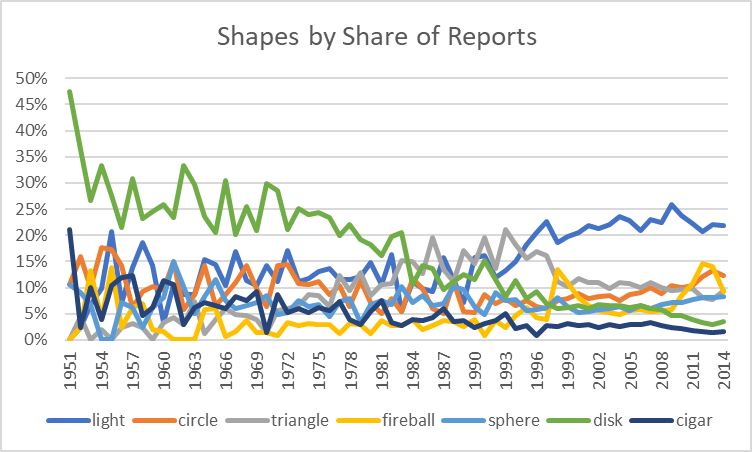

I took the top 5 shapes by volume, and included two others that I thought had interesting trends.  I then represented the data not by total number, since the massive change in volume puts everything in the weeds, but by share of each year's total reports. This made it easier to get an idea of which shapes were being reported each year.

Light, despite finishing with more total reports than the next two combined, was a relatively lower volume report in the early days (0% in 1951), but then steadily climbing in the 90s and continuing to grow fairly steadily over the next 20 years.  

Circle has been extremely consistent over the years, staying between 5 and 18 percent, with even most of that in earlier years when total volume was lower.  If you combine circle with sphere, round, oval, and egg, all similar shapes, it passes light in total reports.  Of course, light has other related shapes as well.

Triangle, by contrast, has had an odd arch.  With 0% in 1951 as well, it wasn't until the late 70s that it accounted for double digits shares, and then in 1993 it was up to 21%.  However, it would then slowly decline, down to 11% in 2001, which it would never pass again.  By 2014, it was below 10% for the third consecutive year.

Fireball might be the weirdest one on this list.  After hovering around 3-4% for almost the entire span, it jumped to 13% in 1998, then back down to a slightly higher plateau of 5-6%.  Then, from 2010-2013, it posted shares of 9, 11, 15, and 14%, before dropping back to 9% in 2014.  I am curious as to whether the partial year affected that, and might look at monthly trends for fireball.  Still, this was an observation very much on the rise.

Sphere isn't quite as stable as circle, but it is comparable, though the past few years did result in slightly higher than average reporting shares.  Interestingly, the same was true of circle as well.  Combining them should result in impressive growth.

"Flying saucer" used to be the default picture for unidentified observations, and you can really see the impact that had, with almost half of all reports in 1951 attributed to disks.  However, as that perception has become less prominent, "sightings" appear to have declined as well.  In fact, disks were 10th in total reports, behind a couple I didn't even bother plotting.  It was just too interesting a trend to leave off.

Cigar was a common enough shape in the 50s, despite disk still going strong at the time.  From there, it slowly dropped off.  On a whim, I wanted to check how this correlated to cigar smoking in the US, and...pretty well!  Between cigar and disk, seeing what's already on one's mind seems a common phenomena.


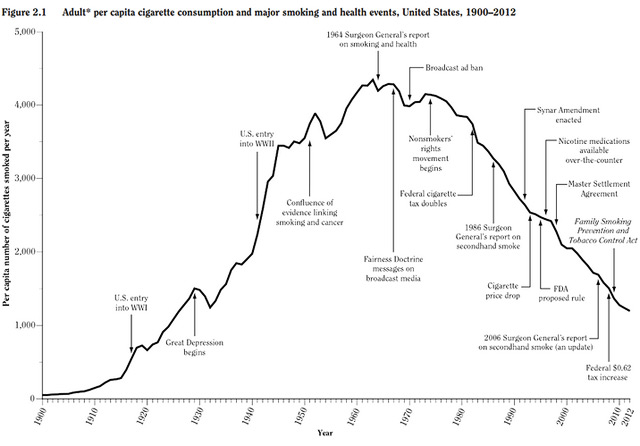


## Statistics
### Countries

In [ ]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '8px'})

### States

In [ ]:
# Groupby by state
state = df.groupby("state")

# Summary statistic of all countries
state.describe().head(15).style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '8px'})

### Shapes

In [ ]:
# Groupby by country
shape = df.groupby("shape")

# Summary statistic of all countries
shape.describe().style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '8px'})

## Word Cloud

In [ ]:
# in the clouds
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.comments:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 7).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize=(25,10), facecolor='None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## "ufo-sightings-1969-to-2019" Word Cloud
### text-column

In [ ]:
# in the clouds
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df3.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 7).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize=(25,10), facecolor='None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### summary-column

In [ ]:
# in the clouds
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df3.summary:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 7,
                normalize_plurals= True
                ).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize=(25,10), facecolor='None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Data Science
## AI - Implementation

## ML - Implementation

In this section, we emulate a decision-maker against our dataset with a chosen variable (column value).
For this case, we've already prepared the randomized column: 'verified'.

We're going to see if we can predict the output of said chosen variable (i.e. 'verified') from a pre-determined use-case. 

In simpler terms:
1. Choose one sample (call it, 'use-case') from the dataset. 
2. We take note of whether or not that sample was 'verified' as one of the following: '2nd-hand','debunked','un-verified', or 'verified'. 
3. We then formulate proper ML-datasets that we'll use to Train & Test various classifiers. 
4. We encode the entire original dataset - enabling the machine to compute a prediction. 
5. We take out the "verified" column completely from the Test set. 
6. We run the classifiers. It uses information gathered from Train data in order to deduct predictions against one of the following variables ('2nd-hand','debunked','un-verified', or 'verified'). 
7. We run the prediction model against the original sample, use-case, of our Test set.
8. A successful classifier predicts the sample's 'verified':value as being equal to the 'verified':value of our original use-case.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# encoding
from sklearn.preprocessing import LabelEncoder

def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded


# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap


# pairplot
import seaborn as sns
def pairplot(df, target):
    return sns.pairplot(df.sample(int(len(df/10000))),hue=target)
    
    
# create X,y variables for ML
from sklearn.model_selection import train_test_split
def X_y_sets(df, target):
    X = df.dropna().drop(columns=[target]).copy()
    y = df.dropna()[target].ravel().copy()
    
    return train_test_split(X, y, test_size=0.33, random_state=42), X, y

## Test Classifier Against Variable Target
### Steps

1. User inputs choice of target variable.
2. Machine chooses random data point in set of data, call it "use-case".
3. Encode randomly generated use case for ML.
4. Classify against present data.
5. Output predicted target value.

If the machine's prediction is wrong, start again from the cells below this.

#### 1. User inputs choice of target variable.

In [ ]:
# construction of ML dataframes
target = 'verified'

# copy
a = df[['city','state','country','latitude',#'comments',\
        'longitude','year_month','comment_length','verified']].copy()

# for the sake of computationa efficiency
a = a.head(10000)

# find random sample & save index for defining an encoded use-case
from random import randrange
idx = randrange(len(a))

#### 2. Machine chooses random data point in set of data, call it "use-case".

In [ ]:
# print random configuration item
print("\nThis is a randomly chosen subject we will try to predict.")
b = pd.DataFrame(a.loc[idx]).T
print(f"\nTarget:'{target}' value is: ",b.reset_index()[target][0])

# store sol'n
solution = str(b.reset_index()[target][0])

# print data point
b
# if this cell fails, try it again from step 1 - you ran into a null variable (i'll fix that soon enough)

#### 3. Encode randomly generated use case for ML

In [ ]:
# categorize/encode entire dataframe(a)
c = encode(a)
print("\nOriginal dataframe encoded into something we can run a classifier against.\n")
c.head(10)

### Feature importance - determines best pair of target variable & classifier.
#### Let's test various classical ML classifiers to find the best model to use.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# classifier iteration
def classification_feat_importance(df_encoded):
    
    # iterate through each column variable as classification targets
    for target in df_encoded.columns.values:
        X = df_encoded.drop(columns=[target]).copy()
        y = df_encoded[target].ravel().copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    
        # classifiers
        #clf1 = GradientBoostingClassifier(criterion="friedman_mse", init=None, learning_rate=0.3338, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
        #clf2 = GradientBoostingClassifier(criterion="squared_error", init=None, learning_rate=0.2222, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
        clf3 = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=42).fit(X_train, y_train)
        clf4 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf5 = AdaBoostClassifier(n_estimators=8000, random_state=42).fit(X_train, y_train)
        clf6 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        clf7 = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
        classifiers = [
                       #clf1, 
                       #clf2, 
                       clf3, 
                       clf4, 
                       clf5,
                       clf6,
                       #clf7
                      ]

        for classifier in classifiers:
            results = []
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            for i in results:
                if target == 'verified':
                    print("\nClassifier:",str(classifier).split("(")[0],"\nTarget:",target,"\nScore:",classifier.score(X_test, y_test))
        
        test_matrix = confusion_matrix(y_test, clf.predict(X_test)) 
        results = pd.DataFrame(results)
        
    return results,test_matrix

print("To analyze which target-classifier would yield the best results: \nUncomment (#) the code below.")

In [ ]:
#classification_feat_importance(c)[0]

### Test Matrix

In [ ]:
#classification_feat_importance(c)[1]

#### Pairplot

In [ ]:
# 'comments' & 'country' - out
sns.pairplot(c[['city','state','latitude','longitude','year_month','comment_length','verified']].sample(1000).copy(),hue=f'{target}')

##### Encoded Data Entry Without Target Variable

In [ ]:
# print encoded item
use_case = pd.DataFrame(c.loc[idx]).T.drop(columns=[target]) 

#c

# print encoded item w/out target info
data = c.drop(columns=[target]) 

print("\nThis is what our encoded 'use-case' looks like - number form, just the way the machine likes it.\n")

use_case

### Generate X-matrix & Target Vector

#### 4. Classify against present data.

In [ ]:
# create X,y variables for ML
# save trainer
print("\nResetting train data...\nCreating X-matrix & y-vector for classification.")
trainer = c.loc[c.index!=idx].copy()
X, y =  trainer.drop(columns=[target]), trainer[target].ravel()
X_train, X_test, y_train, y_test = X_y_sets(trainer, target)[0]

#### This is an example of the encoded X_train set.

In [ ]:
X_train.head().reset_index(drop=True)

#### These are the first 20 values of the encoded y_train

Note the randomness of these values. 
Those represent-

0 = '2nd-hand'

1 = 'debunked'

2 = 'un-verified'

3 = 'verified'

In [ ]:
y_train[0:20]

### Decode Remapping

#### The cell below remaps the encoded values back to their original form (e.g. the report/sightings data)

In [ ]:
# encoded variable re-mapping
# specific to our current target choice
d = encoding_remap(a, c, target)
print("\nDecoding our encoded dataframe to correlate with the initial randomly chosen subject.\n")

#### 5. Use Classifier To Predict Target Value

The cell below runs the classifier to predict the original value of our subject's targeted variable.

Results using the [Multi-Layer Perceptron (MLP) Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) are NOT robust. If you have the time to test the confidence of each classifier, please feel free to uncomment any of the classifiers specified above.

In [ ]:
print("\n-Live prediction-\nThinking...\n")

# choose classifier
#clf = GradientBoostingClassifier(criterion="friedman_mse", init=None, learning_rate=0.3338, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
#clf = GradientBoostingClassifier(criterion="squared_error", init=None, learning_rate=0.2222, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=6, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)

# these ones run just a little more efficiently for now
#clf = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=42).fit(X_train, y_train)
#clf = ExtraTreesClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)
#clf = AdaBoostClassifier(n_estimators=1500, random_state=42).fit(X_train, y_train)
clf = MLPClassifier(alpha=1, max_iter=1200).fit(X_train, y_train)
#clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

print()
print("Test score (confidence): ",clf.score(X_test, y_test)*100,"%")
print()
prediction = clf.predict(use_case)[0]
print(f"Prediction {target} index:",prediction)

# print decoded prediction
print("\nPrediction Decoded")
e = d[d.index == prediction]
e

### Was the machine's prediction correct?

In [ ]:
solved = str(e.verified[e.index[0]])
if solution == solved:
    print(f"\nYUP!\n\nThe machine's prediction against target variable '{target}' was correct!\n")
else:
    print("\nNOPE!\nThe machine's prediction was incorrect :(")
    
print()

# Conclusion

## A Natural Disruption to our comprehension of Modern Science & Philosophy.

# Contributors & Collaborators

## 🌍A Collaborative Effort🌎

Inspired by: [Mr. Tim Ventura](https://www.youtube.com/channel/UCl1ewEFZwBOTU2I_f0XiSUA) & all you nerdy UAP enthusiasts out there. Let's take this interstellar 🚀 and BEYOND! 

Big thanks to *Kevin Kolbe* for his continuous support & unwavering dedication to presenting only what's true - most importantly for always providing honest feedback.

| [Don's LinkedIn](https://www.linkedin.com/in/dontadaya/) | [Tim's LinkedIn](https://www.linkedin.com/in/timothyventura/) | [Gary's LinkedIn](https://www.linkedin.com/in/garv-gary-van-stephenson-963ba36/) | [Omariba's LinkedIn](https://www.linkedin.com/in/omariba-collins-b28b841b9/) |

### Let's all say thanks to [NUFORC](https://nuforc.org/databank/) for sharing the data!
### And most especially a tremendous applause to [Mr. Omariba Collins](https://www.linkedin.com/in/omariba-collins-b28b841b9/) for bringing this phat csv into Kags. 

Feel free to fork, cite, manipulate, scrutinize, comment, and provide insights you deem worthy.

# Notes & Recommendations


Also, look into the latest updates from the National Intelligence Council 
[Assessment of Anomalous Health Incidents](https://www.dni.gov/files/ODNI/documents/assessments/Updated_Assessment_of_Anomalous_Health_Incidents.pdf) regarding anomalous health incidents. Or just see the [latest releases](https://www.dni.gov/index.php/newsroom/reports-publications/reports-publications-2023) from The ODNI to stay informed on all matters of preserving national security. 

### G. Stephenson
Try adding a time sort too to look for correlating events and to possibly form tracks from multiple sightings of the same object. 

Tracks will be especially challenging as these objects are non-ballistic & non-aerodynamic, and have very large spatial 'windows' from sample to sample, i.e. can jump all over the place. So I would recommend starting with a time sort only, and see what the data tells you.


### K. Kolbe
Should exclude shape words from comment counts - especially lights.

(shape vs duration) & (city v shape)


cmap
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter',



Resource(s):

https://medium.com/@jl_ruiz/plot-maps-from-the-us-census-bureau-using-geopandas-and-contextily-in-python-df787647ef77


__________________________________________________________________________

-OFFICE OF THE DIRECTOR OF NATIONAL INTELLIGENCE-

[2022 Annual Report on Unidentified Aerial Phenomena](https://www.dni.gov/files/ODNI/documents/assessments/Unclassified-2022-Annual-Report-UAP.pdf)

APPENDIX B: AARO ESTABLISHMENT OF OFFICE

...

(b) Duties. 

The duties of the Office (...) shall include the following:

(1) Developing procedures to *synchronize and standardize* the collection, reporting, and analysis of incidents, including adverse physiological effects, regarding unidentified aerial phenomena across the Department of Defense and the Intelligence Community.

(2) Developing *processes and procedures* to ensure that such incidents from each component of the Department and each element of the Intelligence Community are reported and incorporated in a *centralized* repository.

(3) Establishing procedures to *require the timely and consistent reporting of such incidents*.

(4) Evaluating links between unidentified aerial phenomena and adversarial foreign governments, other foreign governments, or nonstate actors.

(5) Evaluating the threat that such incidents present to the United States.

(6) Coordinating with other departments and agencies of the Federal Government, as appropriate, including the Federal Aviation Administration, the National Aeronautics and Space Administration, the Department of Homeland Security, the National Oceanic and Atmospheric Administration, and the Department of Energy.

(7) Coordinating with allies and partners of the United States, as appropriate, to better assess the nature and extent of unidentified aerial phenomena.

(8) Preparing reports for Congress, in both classified and unclassified form, including under section (i).



(2) Elements. Each report under paragraph (1) shall include, with respect to the year covered by the report, the following information:

(A) X - All reported unidentified aerial phenomena-related events that occurred during the one-year period.

(B) X - All reported unidentified aerial phenomena-related events that occurred during a period other than that one-year 
period but were not included in an earlier report.

(C) X - An analysis of data and intelligence received through each reported unidentified aerial phenomena related event.

(D) An analysis of data relating to unidentified aerial phenomena collected through: (i) Geospatial intelligence;
    (ii) Signals intelligence;
    (iii) Human intelligence; and
    (iv) Measurement and signature intelligence.

(E) The number of reported unidentified aerial phenomena over restricted air space of the United States during the one-year period.

(F) An analysis of such incidents identified under subparagraph (E).

(G) Identification of potential aerospace or other threats posed by unidentified aerial phenomena to the national security of the United States.

(H) An assessment of any activity regarding unidentified aerial phenomena that can be attributed to one or more adversarial foreign governments.

(I) Identification of any incidents or patterns regarding unidentified aerial phenomena that indicate a potential adversarial foreign government may have achieved a breakthrough aerospace capability.

(J) An update on the coordination by the United States with allies and partners on efforts to track, understand, and address unidentified aerial phenomena.

(K) An update on efforts underway on the ability to capture or exploit discovered unidentified aerial phenomena.

(L) An assessment of any health-related effects for individuals that have encountered unidentified aerial phenomena.

(M) The number of reported incidents, and descriptions thereof, of unidentified aerial phenomena with military nuclear assets, including strategic nuclear weapons and nuclear- powered ships and submarines.

(N) In consultation with the Administrator for Nuclear Security, the number of reported incidents, and descriptions thereof, of unidentified aerial phenomena associated with facilities or assets associated with the production, transportation, or storage of nuclear weapons or components thereof.

(O) In consultation with the Chairman of the Nuclear Regulatory Commission, the number of reported incidents, and descriptions thereof, of unidentified aerial phenomena or drones of unknown origin associated with nuclear power generating stations, nuclear fuel storage sites, or other sites or facilities regulated by the Nuclear Regulatory Commission.

(P) The names of the line organizations that have been designated to perform the specific functions under subsections 

(c) and (d), and the specific functions for which each such line organization has been assigned primary responsibility.

________________________________________________________________
[Establishment of AARO](https://uscode.house.gov/view.xhtml;jsessionid=DB03E8C4835C17412FF33F3488A9B671?req=U.S.+Code&f=treesort&fq=true&num=21020&hl=true&edition=prelim&granuleId=USC-prelim-title54-section200306)